Question #3 (120 points):
Do a little research on the concept of “early stopping for training neural networks” and show how it works. 
You can use any dataset and any architecture.

The classifiers are classifying... Please be patient...


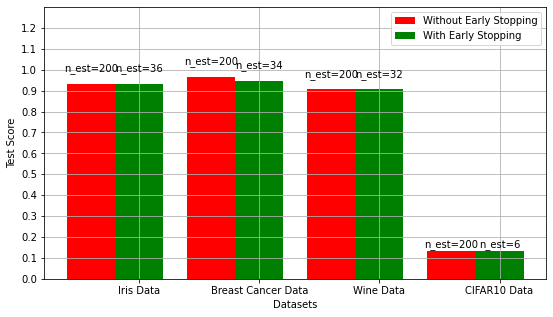

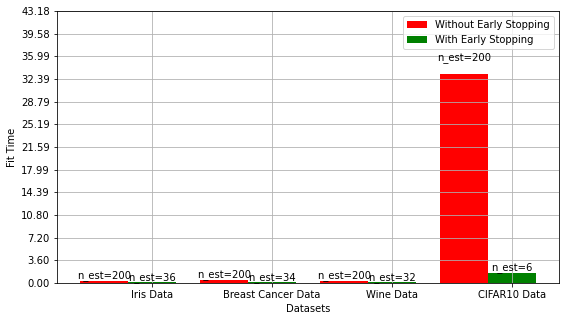

In [1]:
# Adapted from https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_early_stopping.html

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import time
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split

def unpickle(file):
    with open(file, "rb") as fo:
        dic = pickle.load(fo, encoding="bytes")
    return dic

def getCIFAR10(direc, filename, batches):
    for j in range(1, batches+1):
        file = direc + filename + str(j)
        dic = unpickle(file)
        if j == 1:
            x_train = dic[b"data"]
            y_train = dic[b"labels"]
        else:
            temp_x = dic[b"data"]
            temp_y = dic[b"labels"]
            x_train = np.concatenate((x_train, temp_x))
            y_train = np.concatenate((y_train, temp_y))
        return x_train, y_train

def sampleCIFAR10():
    x, y = getCIFAR10("cifar-10-batches-py/", "data_batch_", 1)
    # Subsampling for reducing wait time
    # Adapted from https://github.com/shreyagu/kNN_CiFAR10dataset/blob/master/knn_CIFAR10.ipynb
    num_training = 100
    mask = list(range(num_training))
    x = x[mask]
    y = y[0:num_training]
    return x, y

# Attach a text label above each bar displaying n_estimators of each model
def autolabel(rects, n_estimators):
    for i, rect in enumerate(rects):
        plt.text(rect.get_x() + rect.get_width() / 2.0, 1.05 * rect.get_height(), "n_est=%d" % n_estimators[i], 
                 ha="center", va="bottom")

data_list = [
    datasets.load_iris(return_X_y=True),
    datasets.load_breast_cancer(return_X_y=True),
    datasets.load_wine(return_X_y=True),
    sampleCIFAR10()
]
names = ["Iris Data", "Breast Cancer Data", "Wine Data", "CIFAR10 Data"]

n_gb = []
score_gb = []
time_gb = []
n_gbes = []
score_gbes = []
time_gbes = []

print("The classifiers are classifying... Please be patient...")

n_estimators = 200

for x, y in data_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    # If the scores don't improve by at least 0.01 for the last 5 stages, stop fitting additional stages
    # validation_fraction: the fraction of the dataset that will be kept aside to assess the validation loss of the model
    gbes = ensemble.GradientBoostingClassifier(n_estimators=n_estimators, validation_fraction=0.2, n_iter_no_change=5, tol=0.01)
    gb = ensemble.GradientBoostingClassifier(n_estimators=n_estimators)
    start = time.time()
    gb.fit(x_train, y_train)
    time_gb.append(time.time() - start)

    start = time.time()
    gbes.fit(x_train, y_train)
    time_gbes.append(time.time() - start)

    score_gb.append(gb.score(x_test, y_test))
    score_gbes.append(gbes.score(x_test, y_test))

    n_gb.append(gb.n_estimators_)
    n_gbes.append(gbes.n_estimators_)

bar_width = 0.2
n = len(data_list)
index = np.arange(0, n * bar_width, bar_width) * 2.5
index = index[0:n]

plt.figure(figsize=(9, 5))
bar1 = plt.bar(index, score_gb, bar_width, label="Without Early Stopping", color="red")
bar2 = plt.bar(index + bar_width, score_gbes, bar_width, label="With Early Stopping", color="green")
plt.xticks(index + bar_width, names)
plt.yticks(np.arange(0, 1.3, 0.1))
autolabel(bar1, n_gb)
autolabel(bar2, n_gbes)
plt.ylim([0, 1.3])
plt.legend(loc="best")
plt.grid(True)
plt.xlabel("Datasets")
plt.ylabel("Test Score")
plt.show()

plt.figure(figsize=(9, 5))
bar1 = plt.bar(index, time_gb, bar_width, label="Without Early Stopping", color="red")
bar2 = plt.bar(index + bar_width, time_gbes, bar_width, label="With Early Stopping", color="green")
max_y = np.amax(np.maximum(time_gb, time_gbes))
plt.xticks(index + bar_width, names)
plt.yticks(np.linspace(0, 1.3 * max_y, 13))
autolabel(bar1, n_gb)
autolabel(bar2, n_gbes)
plt.ylim([0, 1.3 * max_y])
plt.legend(loc="best")
plt.grid(True)
plt.xlabel("Datasets")
plt.ylabel("Fit Time")
plt.show()